In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df=pd.read_csv('/Users/tuhinalambijoy/Downloads/final_data.csv')
df

,age,annual_income,financial_responsibility,on-time_payment,credit_utilization,credit_score
0,56,780.24,6,68.11,50.16,646
1,46,1657.77,2,86.29,9.86,850
2,32,658.35,7,94.72,68.35,656
3,60,1426.70,3,76.01,37.54,850
4,25,1568.41,3,76.01,12.64,850
...,...,...,...,...,...,...
995,22,978.50,6,95.78,33.06,789
996,40,761.27,1,80.82,74.47,580
997,27,1111.06,8,62.31,41.24,773
998,61,991.12,7,84.53,19.58,816


# Step 4: Standardization/Normalization
We’ll use Min-Max scaling for features to make them comparable:

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features = ['age', 'annual_income', 'financial_responsibility', 'on-time_payment', 'credit_utilization']
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])
print(df_scaled.head())

        age  annual_income  financial_responsibility  on-time_payment  \
0  0.826087       0.319390                  0.555556         0.362090   
1  0.608696       0.809466                  0.111111         0.725981   
2  0.304348       0.251318                  0.666667         0.894716   
3  0.913043       0.680420                  0.222222         0.520216   
4  0.152174       0.759561                  0.222222         0.520216   

   credit_utilization  credit_score  
0            0.502707           646  
1            0.098657           850  
2            0.685081           656  
3            0.376178           850  
4            0.126529           850  


# Task 2: Explore the Data

Step 1: Credit score ranges and reliability

In [4]:
credit_stats = df['credit_score'].describe()
print("Credit Score Statistics:\n", credit_stats)

# Reliability via standard deviation
print(f"Standard Deviation: {df['credit_score'].std()}")

Credit Score Statistics:
 count    1000.000000
mean      732.255000
std       123.243795
min       395.000000
25%       634.000000
50%       768.000000
75%       850.000000
max       850.000000
Name: credit_score, dtype: float64
Standard Deviation: 123.24379500813826


Step 2: Compare average credit scores by financial responsibility

In [5]:
avg_by_resp = df.groupby('financial_responsibility')['credit_score'].mean()
print("Average Credit Score by Financial Responsibility:\n", avg_by_resp)

Average Credit Score by Financial Responsibility:
 financial_responsibility
1     671.150538
2     714.416667
3     718.811881
4     726.030000
5     730.228916
6     749.144444
7     755.431818
8     750.932039
9     745.494505
10    765.702381
Name: credit_score, dtype: float64


Step 3: Visualize relationships

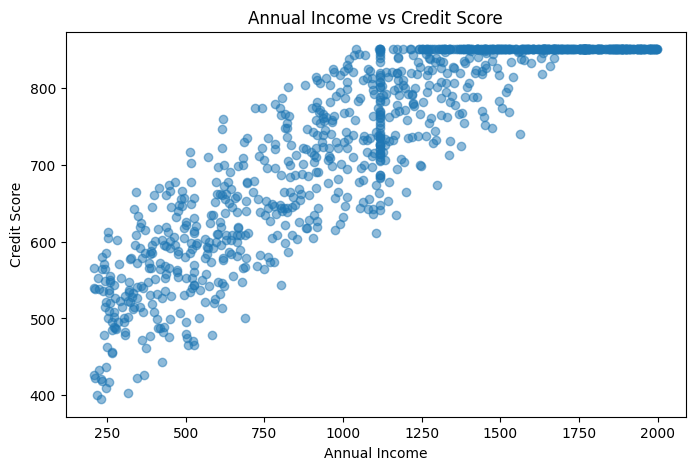

In [6]:
# Scatter: Annual Income vs Credit Score
plt.figure(figsize=(8,5))
plt.scatter(df['annual_income'], df['credit_score'], alpha=0.5)
plt.title('Annual Income vs Credit Score')
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.show()

# corelation Heatmap

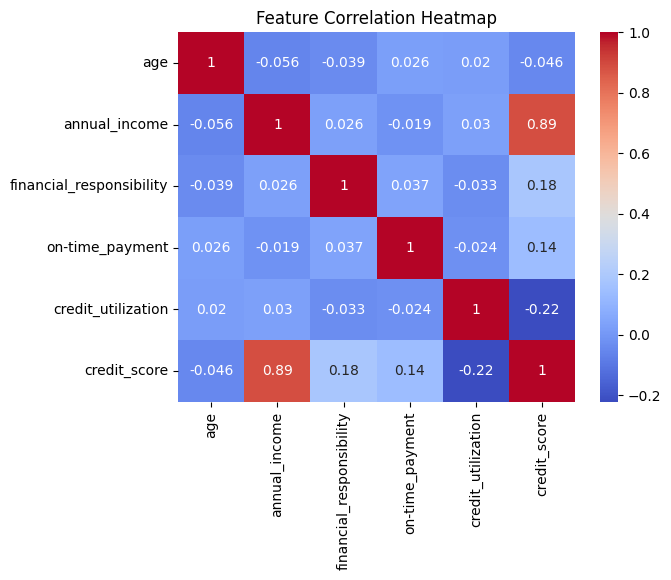

In [7]:
# Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Task 3: Detect Trends

In [8]:
# Age trend
df['age_group'] = pd.cut(df['age'], bins=[18,30,40,50,60,70])
age_trend = df.groupby('age_group')['credit_score'].mean()
print("Average Credit Score by Age Group:\n", age_trend)

Average Credit Score by Age Group:
 age_group
(18, 30]    744.552419
(30, 40]    736.281407
(40, 50]    725.280335
(50, 60]    719.293532
(60, 70]    738.659091
Name: credit_score, dtype: float64


/var/folders/ln/mfsj98bx14b0vxrqngf07nvr0000gn/T/ipykernel_12471/2080673918.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_trend = df.groupby('age_group')['credit_score'].mean()


# Task 4: Build Prediction Systems

Step 1: Split data

In [9]:
from sklearn.model_selection import train_test_split

X = df_scaled[features]
y = df_scaled['credit_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 2: Machine Learning Model (Random Forest)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf)}")

Random Forest Performance:
MAE: 12.862849999999998
R2 Score: 0.9780880549929011


# Gradient Boosting (XGBoost) 

GRADIENT BOOSTING PERFORMANCE:
Mean Absolute Error (MAE): 10.465
R² Score: 0.9856
Root Mean Square Error (RMSE): 15.276

Feature Importance:
                 Feature  Importance
           annual_income    0.850063
      credit_utilization    0.082330
         on-time_payment    0.036579
financial_responsibility    0.030033
                     age    0.000996


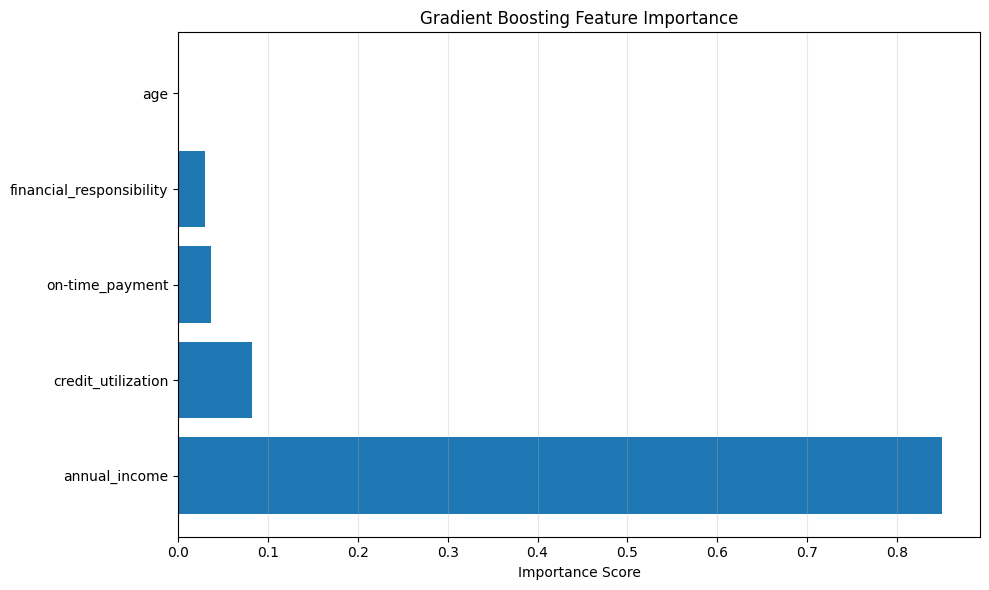

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Initialize Gradient Boosting
gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=10,
    random_state=42,
    subsample=0.8  # Add some randomness
)

# Train
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print("="*60)
print("GRADIENT BOOSTING PERFORMANCE:")
print("="*60)
print(f"Mean Absolute Error (MAE): {mae_gb:.3f}")
print(f"R² Score: {r2_gb:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse_gb:.3f}")

# Feature importance
feature_importance_gb = pd.DataFrame({
    'Feature': features,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_gb.to_string(index=False))

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance_gb['Feature'], feature_importance_gb['Importance'])
plt.xlabel('Importance Score')
plt.title('Gradient Boosting Feature Importance')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Step 3: Deep Learning Model (Neural Network)

In [12]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(5,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

y_pred_nn = model.predict(X_test).flatten()
print("Neural Network Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_nn)}")
print(f"R2 Score: {r2_score(y_test, y_pred_nn)}")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Neural Network Performance:
MAE: 80.25627136230469
R2 Score: 0.3919098377227783


# prediction

In [13]:
new_applicant = [[30, 50000, 7, 85, 25]]  # age, income, responsibility, on-time %, utilization
new_scaled = scaler.transform(new_applicant)
pred_score_rf = rf.predict(new_scaled)[0]
pred_score_nn = model.predict(new_scaled, verbose=0)[0][0]

print(f"Predicted Credit Score (RF): {pred_score_rf}")
print(f"Predicted Credit Score (NN): {pred_score_nn}")

Predicted Credit Score (RF): 850.0
Predicted Credit Score (NN): 9063.951171875


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [14]:
new_applicant = [[30, 670, 7, 85, 25]]  # age, income, responsibility, on-time %, utilization
new_scaled = scaler.transform(new_applicant)
pred_score_rf = rf.predict(new_scaled)[0]
pred_score_nn = model.predict(new_scaled, verbose=0)[0][0]

print(f"Predicted Credit Score (RF): {pred_score_rf}")
print(f"Predicted Credit Score (NN): {pred_score_nn}")

Predicted Credit Score (RF): 698.53
Predicted Credit Score (NN): 644.7963256835938


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


#  Trend Across Financial Responsibility Levels

In [15]:
# Group by financial responsibility
payment_by_responsibility = df.groupby('financial_responsibility')['on-time_payment'].agg(['mean', 'std', 'count'])
print("On-Time Payment by Financial Responsibility Level:")
print(payment_by_responsibility)

# Correlation between responsibility score and payment
corr_resp_payment = df['financial_responsibility'].corr(df['on-time_payment'])
print(f"\nCorrelation between Financial Responsibility and On-Time Payment: {corr_resp_payment:.3f}")

On-Time Payment by Financial Responsibility Level:
                               mean        std  count
financial_responsibility                             
1                         74.619892  12.673708     93
2                         76.352619  14.921935     84
3                         74.284059  14.316182    101
4                         74.592600  14.594081    100
5                         76.625964  13.349322    166
6                         75.654333  12.950934     90
7                         79.051818  14.397110     88
8                         78.075049  14.184105    103
9                         75.637473  14.103307     91
10                        74.788095  13.324234     84

Correlation between Financial Responsibility and On-Time Payment: 0.037


#  Trend Across Income Groups

Average On-Time Payment by Income Group:
income_group
<500         77.103125
500-1000     76.719725
1000-1500    74.607013
1500-2000    76.338801
>2000              NaN
Name: on-time_payment, dtype: float64


/var/folders/ln/mfsj98bx14b0vxrqngf07nvr0000gn/T/ipykernel_12471/3727133926.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_by_income = df.groupby('income_group')['on-time_payment'].mean()


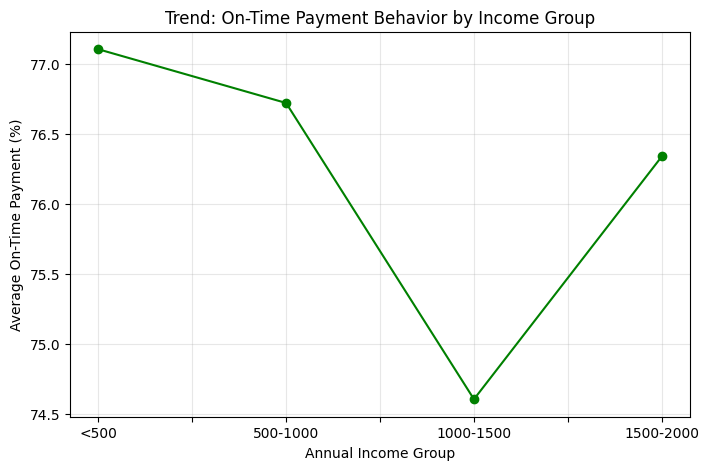

In [16]:
# Create income groups
income_bins = [0, 500, 1000, 1500, 2000, 2500]
income_labels = ['<500', '500-1000', '1000-1500', '1500-2000', '>2000']
df['income_group'] = pd.cut(df['annual_income'], bins=income_bins, labels=income_labels)

# Calculate average payment by income group
payment_by_income = df.groupby('income_group')['on-time_payment'].mean()
print("Average On-Time Payment by Income Group:")
print(payment_by_income)

# Visualize
plt.figure(figsize=(8,5))
payment_by_income.plot(kind='line', marker='o', color='green')
plt.title('Trend: On-Time Payment Behavior by Income Group')
plt.xlabel('Annual Income Group')
plt.ylabel('Average On-Time Payment (%)')
plt.grid(True, alpha=0.3)
plt.show()

# 4. Trend: On-Time Payment vs Credit Score

Average Credit Score by Payment Behavior:
payment_category
Poor (<60%)         716.367089
Fair (60-75%)       712.241993
Good (75-90%)       742.690608
Excellent (>90%)    754.145729
Name: credit_score, dtype: float64


/var/folders/ln/mfsj98bx14b0vxrqngf07nvr0000gn/T/ipykernel_12471/2160111273.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  score_by_payment = df.groupby('payment_category')['credit_score'].mean()


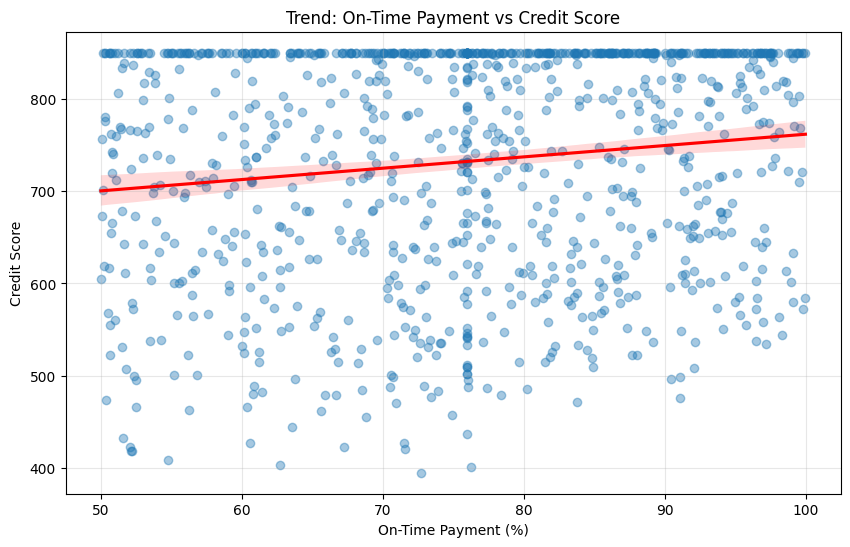

In [17]:
# Create payment behavior groups
payment_bins = [0, 60, 75, 90, 100]
payment_labels = ['Poor (<60%)', 'Fair (60-75%)', 'Good (75-90%)', 'Excellent (>90%)']
df['payment_category'] = pd.cut(df['on-time_payment'], bins=payment_bins, labels=payment_labels)

# Average credit score by payment category
score_by_payment = df.groupby('payment_category')['credit_score'].mean()
print("Average Credit Score by Payment Behavior:")
print(score_by_payment)

# Scatter plot with trend line
plt.figure(figsize=(10,6))
sns.regplot(x='on-time_payment', y='credit_score', data=df, scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Trend: On-Time Payment vs Credit Score')
plt.xlabel('On-Time Payment (%)')
plt.ylabel('Credit Score')
plt.grid(True, alpha=0.3)
plt.show()

# 5. Trend: Payment Behavior vs Credit Utilization

Average Credit Utilization by Payment Behavior:
payment_category
Poor (<60%)         47.418924
Fair (60-75%)       51.226299
Good (75-90%)       47.950635
Excellent (>90%)    47.255226
Name: credit_utilization, dtype: float64


/var/folders/ln/mfsj98bx14b0vxrqngf07nvr0000gn/T/ipykernel_12471/3120207874.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  util_by_payment = df.groupby('payment_category')['credit_utilization'].mean()


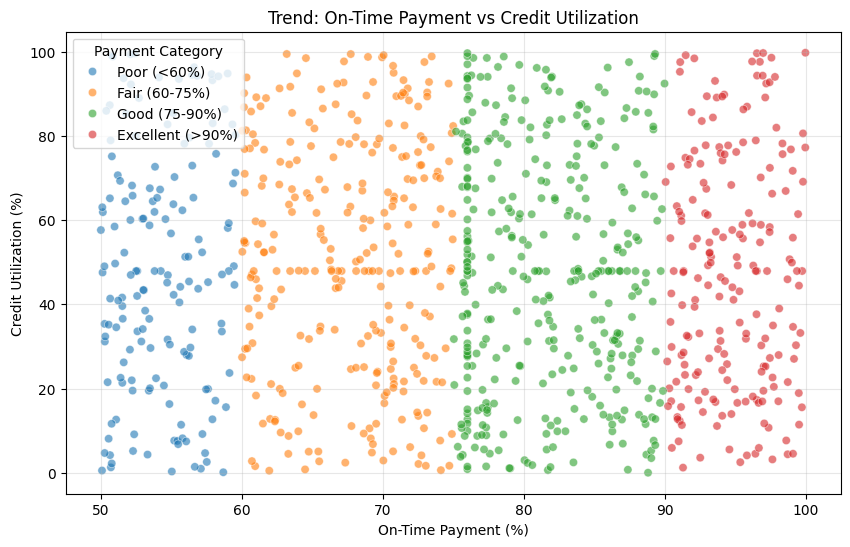

In [18]:
# Calculate average utilization by payment category
util_by_payment = df.groupby('payment_category')['credit_utilization'].mean()
print("Average Credit Utilization by Payment Behavior:")
print(util_by_payment)

# Visualize the relationship
plt.figure(figsize=(10,6))
sns.scatterplot(x='on-time_payment', y='credit_utilization', hue='payment_category', data=df, alpha=0.6)
plt.title('Trend: On-Time Payment vs Credit Utilization')
plt.xlabel('On-Time Payment (%)')
plt.ylabel('Credit Utilization (%)')
plt.grid(True, alpha=0.3)
plt.legend(title='Payment Category')
plt.show()

# Statistical Trend Analysis

In [19]:
from scipy import stats

# Test if there's a statistically significant trend
slope, intercept, r_value, p_value, std_err = stats.linregress(df['on-time_payment'], df['credit_score'])
print(f"Linear Regression Results (Payment → Credit Score):")
print(f"Slope: {slope:.3f} (For every 1% increase in payment, credit score increases by {slope:.1f} points)")
print(f"R-squared: {r_value**2:.3f}")
print(f"P-value: {p_value:.6f}")
print(f"Trend is {'statistically significant' if p_value < 0.05 else 'not statistically significant'}")

Linear Regression Results (Payment → Credit Score):
Slope: 1.228 (For every 1% increase in payment, credit score increases by 1.2 points)
R-squared: 0.019
P-value: 0.000011
Trend is statistically significant
